Hello

In [1]:
import pandas as pd             
import numpy as np              
import matplotlib.pyplot as plt 
import seaborn as sns            
from sklearn.model_selection import train_test_split  #Splitting data
from sklearn.linear_model import LinearRegression      #Linear regression model
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn import preprocessing #Normalizing

C:\Users\subai\AppData\Local\Temp\ipykernel_22812\3791890670.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Cleaning the dataset that contains socioeconomic context of each decade. 
Many economic indicators have missing data and the years 1960-1969 does not have data on most of the indicators. These rows and columns have been removed for analysis.

In [2]:
economics_data = pd.read_csv('data_files/socioeconomic_context_Data.csv')


economics_data = economics_data.iloc[[1,5],].reset_index(drop=True)
economics_data.drop(list(economics_data.columns)[0:2], axis=1, inplace=True)
economics_data.drop(list(economics_data.columns)[1:3], axis=1, inplace=True)
economics_data.drop(list(economics_data.columns)[-1:], axis=1, inplace=True)

GDP_growth = np.array(economics_data.iloc[0][1:])
normalized_GDP_growth = preprocessing.normalize([GDP_growth]).tolist()[0]

unexployment_rate = np.array(economics_data.iloc[1][1:])
normalized_unemployment_rate = preprocessing.normalize([unexployment_rate]).tolist()[0]

economic_score = []
year = []
for index in range(len(normalized_GDP_growth)):
    score = normalized_GDP_growth[index] - normalized_unemployment_rate[index]
    economic_score.append(score)
    year.append(1961+index)

economics_df = pd.DataFrame({
    'year': year,
    'economic_score' : economic_score
})

print(economics_df)



    year  economic_score
0   1961       -0.110362
1   1962        0.083751
2   1963        0.010650
3   1964        0.083758
4   1965        0.130486
..   ...             ...
58  2019        0.017638
59  2020       -0.301602
60  2021        0.148617
61  2022        0.018845
62  2023        0.029899

[63 rows x 2 columns]


In [3]:
music_60s = pd.read_csv('data_files/1960.csv')
music_70s = pd.read_csv('data_files/1970.csv')
music_80s = pd.read_csv('data_files/1980.csv')
music_90s = pd.read_csv('data_files/1990.csv')
music_00s = pd.read_csv('data_files/2000.csv')
music_10s = pd.read_csv('data_files/2010.csv')

music_df = pd.concat([music_60s, music_70s,music_80s,music_90s, music_00s, music_10s], ignore_index=True, axis=0)
music_df= music_df.sort_values('year')

music_df.drop(list(music_df.columns)[0:4], axis=1, inplace=True) 
print(music_df.isnull().values.any())#is there any null values in the table




False


In [18]:
df = economics_df.merge(music_df, on = 'year')
df = df.groupby(df.year).mean([list(df.columns)])
print(music_df.isnull().values.any())

print(df.columns)


False
Index(['economic_score', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch', 'pop'],
      dtype='object')


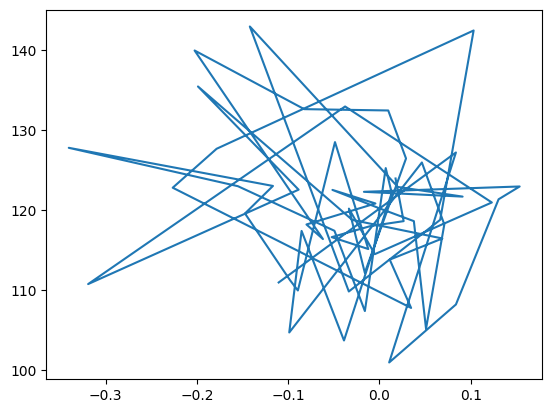

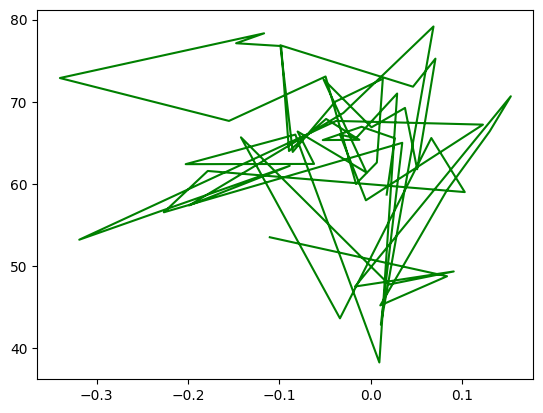

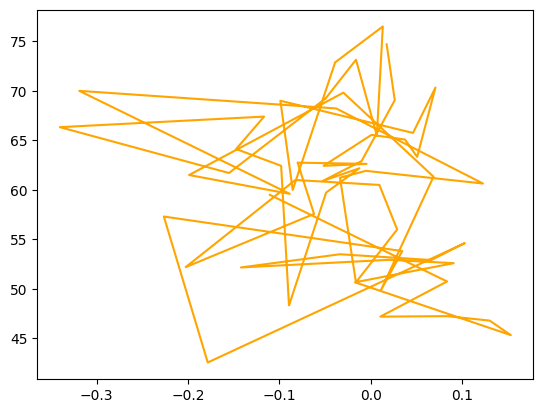

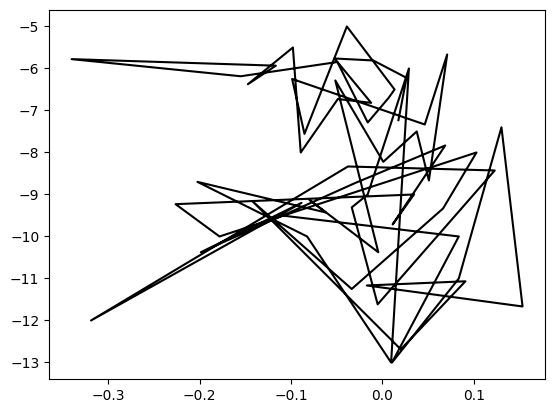

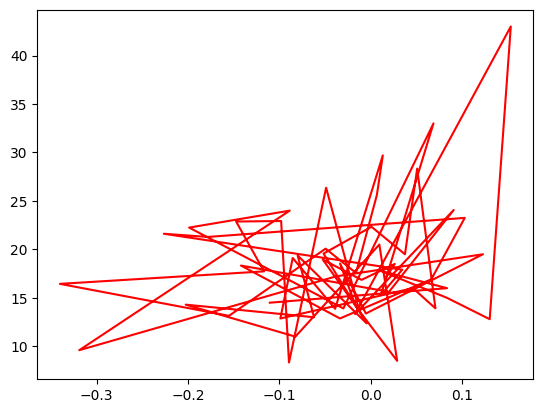

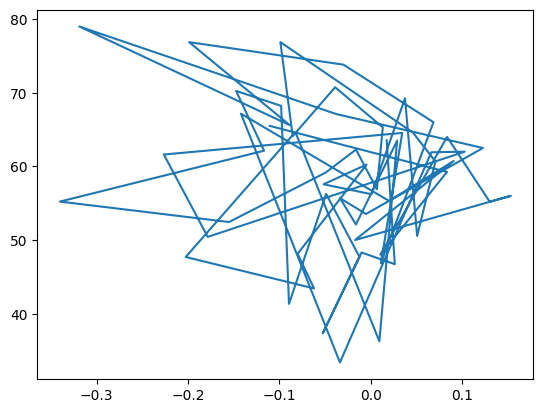

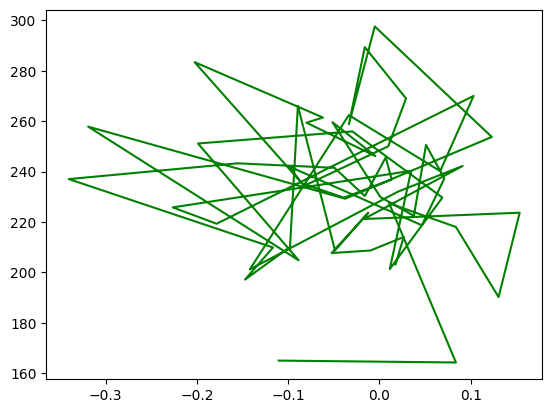

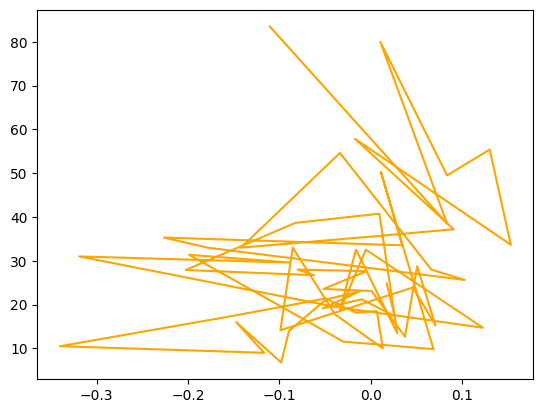

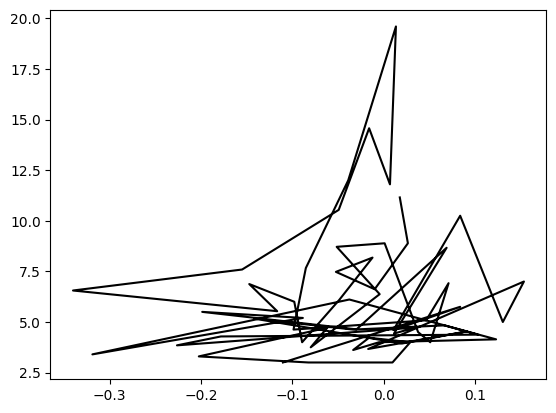

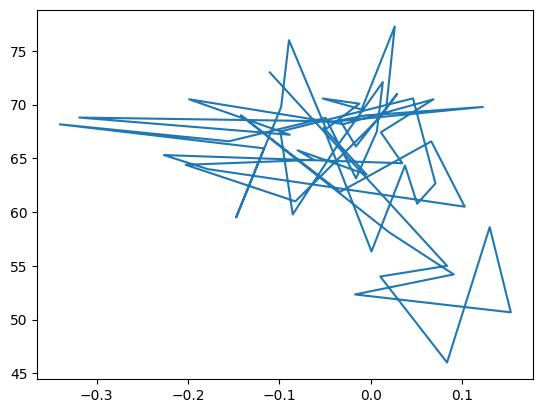

economic_score    1.000000
live              0.247344
spch              0.149687
acous             0.100693
nrgy             -0.065291
dur              -0.071029
dB               -0.087975
bpm              -0.130004
val              -0.132971
dnce             -0.178865
pop              -0.314863
Name: economic_score, dtype: float64


In [21]:
x_axis = df.economic_score
plt.plot(x_axis,df.bpm)
plt.show()
plt.close()



plt.plot(x_axis,df.nrgy,color='green')
plt.show()
plt.close()


plt.plot(x_axis,df.dnce,color='orange')
plt.show()
plt.close()


plt.plot(x_axis,df.dB,color='black')
plt.show()
plt.close()

plt.plot(x_axis,df.live,color='red')
plt.show()
plt.close()

plt.plot(x_axis,df.val)
plt.show()
plt.close()


plt.plot(x_axis,df.dur,color='green')
plt.show()
plt.close()

plt.plot(x_axis,df.acous,color='orange')
plt.show()
plt.close()

plt.plot(x_axis,df.spch,color='black')
plt.show()
plt.close()

plt.plot(x_axis,df['pop'])
plt.show()
plt.close()

correlations = df.corr(numeric_only=True)['economic_score'].sort_values(ascending=False)
print(correlations)
